<a href="https://colab.research.google.com/github/Dilhani98/Machine_Learning_project/blob/main/194032N_Dilhani_M_G_N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Specify the path to the CSV file within your Google Drive
csv_file_path = '/content/gdrive/My Drive/Colab Notebooks/Assignement/weatherHistory.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' contains your CSV data, and you can work with it in your Colab notebook.
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
df.describe()

Loud cover contain all 0 values.it can be data entry error.so remove the column to simplify dataset and reduce noise.

In [ ]:
df.drop(columns=['Loud Cover'], inplace=True)
df

In [ ]:
X_cols = ["Apparent Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]
y_cols = ["Temperature (C)"]
sns.pairplot(df,x_vars= X_cols,y_vars= y_cols)

In [ ]:
df.hist(linewidth=1.2, figsize=(12,8));




1.   Handling Missing Values



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Precip Type')
plt.title('Distribution of Categories')
plt.xlabel('Precip Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Precip Type contain 5% of missing values. large dataset small precentage of missing values.so we can delete missing values. but when look at distribution there is a clear majority category(rain) in the dataset. so it is good to impute missing value with rain.percentage of missing values is relatively small, and there is a clear majority category in the dataset.so impute missing value with mode.

In [ ]:
# Replace missing values in the 'Precip Type' column with 'Rain'
df['Precip Type'].fillna('Rain', inplace=True)
df

2. Handling outliers


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the columns to create box plots for
columns_to_plot = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                   'Wind Bearing (degrees)', 'Visibility (km)',
                   'Pressure (millibars)', 'Temperature (C)']

# Calculate the number of subplots based on the number of columns
num_plots = len(columns_to_plot)

# Determine the number of rows and columns for the subplots
num_rows = 2  # Number of rows
num_cols = (num_plots + num_rows - 1) // num_rows  # Calculate the number of columns

# Create subplots with a larger figure size and arranged in multiple rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each column and create box plots in separate subplots
for i, column_name in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(df[column_name], vert=False)
    axes[row, col].set_title(f'Box Plot for {column_name}')
    axes[row, col].set_xlabel(column_name)

# Remove any empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



By refering box plot we can see Apparent temparature, Humidity, wind speed,pressure and temperature have more outliers. Before dealing with outliers we have to identify them.

In [ ]:
import pandas as pd
import numpy as np


# List of numerical variables to process
columns = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                    'Wind Bearing (degrees)', 'Visibility (km)',
                    'Pressure (millibars)', 'Temperature (C)']

# Dictionary to store outlier counts
outlier_counts = {}

for var in columns:
    # Calculate the Z-scores for the variable
    z_scores = (df[var] - df[var].mean()) / df[var].std()

    # Identify outliers using Z-score method for the variable
    outliers = df.loc[z_scores.abs() > 3]  # Replace '3' with your desired Z-score threshold

    # Get the count of outliers and store it in the dictionary
    outlier_counts[var] = outliers.shape[0]

# Print the outlier counts for each variable
for var, count in outlier_counts.items():
    print(f"Count of outliers for '{var}': {count}")


when refer both box plot and z-score method, visisbility and wind bearing has no outliers. wind speed and pressure has more outliers. Apparent temparature, temparature and humidity has less number of outilers. so we futher analyze these outilers to get decison for handling.

In [ ]:
import pandas as pd
import numpy as np


# Calculate the Z-scores for 'Temperature (C)'
z_scores_temp = (df['Temperature (C)'] - df['Temperature (C)'].mean()) / df['Temperature (C)'].std()

# Identify outliers using Z-score method for 'Temperature (C)'
outliers_temp_z = df.loc[z_scores_temp.abs() > 3]

# Calculate IQR and identify outliers using IQR method for 'Temperature (C)'
Q1_temp = df['Temperature (C)'].quantile(0.25)
Q3_temp = df['Temperature (C)'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp
outliers_temp_iqr = df.loc[(df['Temperature (C)'] < lower_bound_temp) | (df['Temperature (C)'] > upper_bound_temp)]

# Display summary statistics and sample data for contextual and temporal analysis
outlier_summary_z = outliers_temp_z[['Formatted Date', 'Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Temperature (C)']].sample(10)
outlier_summary_iqr = outliers_temp_iqr[['Formatted Date', 'Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Temperature (C)']].sample(10)

print("Summary of Outliers using Z-score:")
display(outlier_summary_z)

print("\nSummary of Outliers using IQR:")
display(outlier_summary_iqr)

It seems these outliers get due to whether pattern in february month. so they are valid data points. so will keep them.

In [ ]:
import pandas as pd
import numpy as np


# Calculate the Z-scores for 'Temperature (C)'
z_scores_temp = (df['Humidity'] - df['Humidity'].mean()) / df['Humidity'].std()

# Identify outliers using Z-score method for 'Temperature (C)'
outliers_temp_z = df.loc[z_scores_temp.abs() > 3]

# Calculate IQR and identify outliers using IQR method for 'Temperature (C)'
Q1_temp = df['Humidity'].quantile(0.25)
Q3_temp = df['Humidity'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp
outliers_temp_iqr = df.loc[(df['Humidity'] < lower_bound_temp) | (df['Humidity'] > upper_bound_temp)]

# Display summary statistics and sample data for contextual and temporal analysis
outlier_summary_z = outliers_temp_z[['Formatted Date', 'Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Temperature (C)']].sample(10)
outlier_summary_iqr = outliers_temp_iqr[['Formatted Date', 'Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Temperature (C)']].sample(10)

print("Summary of Outliers using Z-score:")
display(outlier_summary_z)

print("\nSummary of Outliers using IQR:")
display(outlier_summary_iqr)

In [ ]:
import pandas as pd
import numpy as np


# Calculate the Z-scores for 'Temperature (C)'
z_scores_temp = (df['Pressure (millibars)'] - df['Pressure (millibars)'].mean()) / df['Pressure (millibars)'].std()

# Identify outliers using Z-score method for 'Temperature (C)'
outliers_temp_z = df.loc[z_scores_temp.abs() > 3]

# Calculate IQR and identify outliers using IQR method for 'Temperature (C)'
Q1_temp = df['Pressure (millibars)'].quantile(0.25)
Q3_temp = df['Pressure (millibars)'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp
outliers_temp_iqr = df.loc[(df['Pressure (millibars)'] < lower_bound_temp) | (df['Pressure (millibars)'] > upper_bound_temp)]

# Display summary statistics and sample data for contextual and temporal analysis
outlier_summary_z = outliers_temp_z[['Formatted Date','Pressure (millibars)', 'Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Temperature (C)']].sample(10)
outlier_summary_iqr = outliers_temp_iqr[['Formatted Date', 'Pressure (millibars)','Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Temperature (C)']].sample(10)

print("Summary of Outliers using Z-score:")
display(outlier_summary_z)

print("\nSummary of Outliers using IQR:")
display(outlier_summary_iqr)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Pressure (millibars)'])
plt.title("Boxplot for Pressure (millibars)")
plt.xlabel("Pressure (millibars)")
plt.show()


seems pressure dataset outliers identifying is challenging. i think  distribution of data is complex

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.kdeplot(df["Pressure (millibars)"], shade=True)
plt.title("Kernel Density Estimation (KDE) Plot")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Density")
plt.show()


according to this graph spread more data around 1000 and others spread around 0.

In [ ]:
count_pressure_zero = len(df[df['Pressure (millibars)'] == 0])

# 'count_pressure_zero' contains the count of rows where 'Pressure (millibars)' is equal to 0
print("Count of 'Pressure (millibars)' = 0:", count_pressure_zero)


Count of 'Pressure (millibars)' = 0: 1288


before we get outlier count as 1288. compare with this result these outliers come from 0 value. zero atmospheric pressure is not a realistic measurement. so these are completely outliers.so i choose to remove these outliers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2)
plt.tight_layout()
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q1 = df['Pressure (millibars)'].quantile(0.25)
Q3 = df['Pressure (millibars)'].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df
df['Pressure (millibars)'] = np.where(df['Pressure (millibars)']>upper_limit,upper_limit,df2['Pressure (millibars)'])
df['Pressure (millibars)'] = np.where(df['Pressure (millibars)']<lower_limit,lower_limit,df2['Pressure (millibars)'])
print("Shape After Removing Outliers:", df.shape)
sns.boxplot(df2['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2)
plt.tight_layout()
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['Wind Speed (km/h)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df
df['Wind Speed (km/h)'] = np.where(df['Wind Speed (km/h)']>upper_limit,upper_limit,df2['Wind Speed (km/h)'])
df['Wind Speed (km/h)'] = np.where(df['Wind Speed (km/h)']<lower_limit,lower_limit,df2['Wind Speed (km/h)'])
print("Shape After Removing Outliers:", df.shape)
sns.boxplot(df2['Wind Speed (km/h)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()


# Transformation



In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Create a grid with Q-Q plots and histograms
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

num_vars = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
            'Wind Bearing (degrees)', 'Visibility (km)',
            'Pressure (millibars)']

for i, var in enumerate(num_vars):
    # Q-Q Plot
    row = i // 6
    col = i % 6
    stats.probplot(df[var], dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q Plot of {var}')

    # Histogram
    row = row + 1  # Move to the next row for histograms
    axes[row, col].hist(df[var], bins=30, color='skyblue', edgecolor='black')
    axes[row, col].set_title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


all distributions look like normally distributed. it doesn't need any transformations.

#Feature Coding

Let's perform one hot encoding to provide values for categorical data.

In [ ]:
# perform one hot encoding with k
data = pd.get_dummies(data, columns=['Summary','Precip Type','Daily Summary'])


#Feature Scaling


In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)



#PCA


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data =df
numeric_data = ['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                   'Wind Bearing (degrees)', 'Visibility (km)',
                   'Pressure (millibars)', 'Temperature (C)']

numeric_columns = data.select_dtypes(include=['number'])

# Standardize your data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)
# Create a DataFrame with the scaled data
x = pd.DataFrame(scaled_data)

# Apply PCA to the scaled data
pca = PCA()
X_pca = pca.fit_transform(x)
#X_reduced = PCA(n_components=5).fit_transform(X_pca)

principalDf = pd.DataFrame(data = X_pca)
principalDf.head(10)



ValueError: ignored

In [ ]:
pca.explained_variance_ratio_

array([0.39411782, 0.16490099, 0.14421675, 0.13495871, 0.10269339,
       0.05839555, 0.0007168 , 0.        ])

first five principal components explain a relatively higher proportion of the variance compared to the later twos.first 5 principal components are sufficient to capture 95% of the total variance in the dataset

#Identifying Significant and Independent Features

In [ ]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




In [ ]:
# Convert the correlation matrix to a table
correlation_table = correlation_matrix.to_string()

# Print or display the correlation matrix as a table
print("Correlation Matrix as Table:")
print(correlation_table)


* Apparent Temperature (C) : highly correlated with "Temperature (C)" (correlation coefficient of 0.992629). it can be possible. because apparent temperature is derived from the actual temperature and other factors. so they are not independent.

* Humidity: Humidity has a moderate negative correlation with temperature. It could be a significant predictor because there's a relationship, and it's not highly correlated with other variables.

* Wind Speed (km/h): Wind Speed has a low positive correlation with temperature. It's not highly correlated with other variables and may be a significant predictor.

* Wind Bearing (degrees): This feature has a low correlation with temperature.

* Visibility (km): Visibility has a moderate positive correlation with temperature. It could be a significant predictor.

* Pressure (millibars): Pressure has a low correlation with temperature.



#Data Selection


In [ ]:
X = df[['Humidity','Apparent Temperature (C)',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]
y = df["Temperature (C)"].values

X represents feature matrix, which contains the independent variables.
y represents target variable, which you want to predict.(predict temperature)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

 20% of the data will be used for testing, and the remaining 80% for training.

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train,y_train)

print("linear regression Coef:",lr.coef_)
print("linear regression Intercept:",lr.intercept_)

linear regression Coef: [-1.41898621e+00  8.72566684e-01  7.97670315e-02 -4.04011835e-04
  8.62917874e-03 -2.05656529e-04]
linear regression Intercept: 2.831985728894681


In [ ]:
# Get the predicted values using test data
y_pred = lr.predict(X_test)

print("Predicted values:", y_pred)

Predicted values: [28.10156877  9.59708665 15.17032123 ... 12.00162429 24.81693423
 19.51879461]


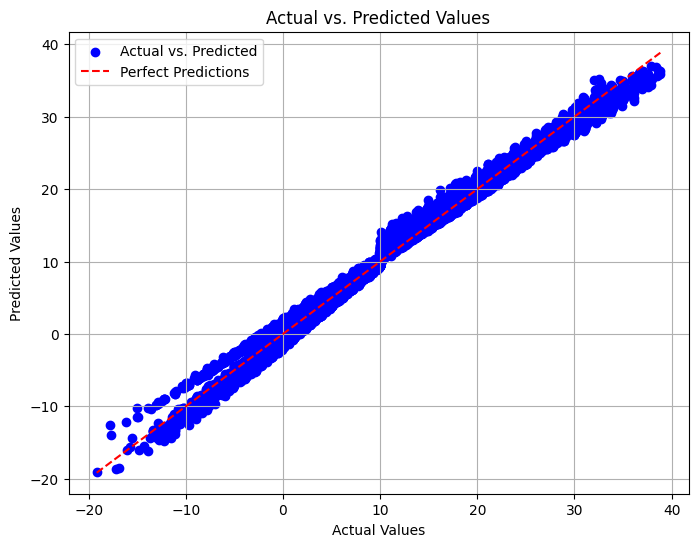

In [ ]:
import matplotlib.pyplot as plt
# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Predictions')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

 the data points are scattered closely around the red line, it suggests that your model is making accurate predictions.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-squared: 0.9902437799520607
Mean Squared Error: 0.89912616805208
Mean Absolute Error: 0.7424884675274087




* R-squared value of 0.9902 is very close to 1, which suggests that model explains approximately 99.02% of the variance in the target variable. This is a very high R-squared value, indicating that model is doing an excellent job of fitting the data.
* MSE value of 0.8991 is relatively low. MSE measures the average squared difference between the actual and predicted values, and a lower value indicates smaller prediction errors.
*   MAE value of 0.7425 is also relatively low. MAE measures the average absolute difference between the actual and predicted values. Like MSE, a lower MAE suggests smaller errors in prediction.

These metrics collectively suggest that linear regression model is providing accurate and precise predictions for the target variable.






In [ ]:
 # Perform 5-fold cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)

predictions = cross_val_predict(model, X_train, y_train, cv=5)
accuracy = metrics.r2_score( y_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-validated scores: [0.99008292 0.9899722  0.99000974 0.99024206 0.99016745]
Cross-Predicted Accuracy: 0.9900966797560411


##Lasso Regression with Cross Validation

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

# X_train: Training feature matrix, y_train: Training target variable
# X_test: Test feature matrix

# Create a LassoCV model with K-fold cross-validation (K=10)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=KFold(n_splits=10))

# Fit the LassoCV model to training data
lasso_cv.fit(X_train, y_train)

# Get the best alpha (regularization parameter) determined by cross-validation
best_alpha = lasso_cv.alpha_

# Make predictions for the test dataset
y_pred_lasso = lasso_cv.predict(X_test)

# y_pred_lasso now contains the predicted values for the test data

print("Predicted values using Lasso Regression:", y_pred_lasso)



Predicted values using Lasso Regression: [28.10222857  9.60128465 15.16817644 ... 11.99165064 24.81627813
 19.51728219]


##Ridge Regression with Cross Validation

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

# Assuming you have X_train, y_train, and X_test
# X_train: Training feature matrix, y_train: Training target variable
# X_test: Test feature matrix

# Create a RidgeCV model with K-fold cross-validation (K=10)
ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=KFold(n_splits=10))

# Fit the RidgeCV model to your training data
Rmodel = ridge_cv.fit(X_train, y_train)

# Get the best alpha (regularization parameter) determined by cross-validation
best_alpha = ridge_cv.alpha_

# Make predictions for the test dataset
y_pred_ridge = ridge_cv.predict(X_test)

# y_pred_ridge now contains the predicted values for the test data

# You can print or use the predicted values as needed
print("Predicted values using Ridge Regression:", y_pred_ridge)


Predicted values using Ridge Regression: [28.10158535  9.59716631 15.17028022 ... 12.00143687 24.8169232
 19.51876674]


In [ ]:
 # Perform 5-fold cross validation
scores = cross_val_score(Rmodel, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)

predictions = cross_val_predict(Rmodel, X_train, y_train, cv=5)
accuracy = metrics.r2_score( y_train, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-validated scores: [0.99008292 0.9899722  0.99000977 0.99024205 0.99016742]
Cross-Predicted Accuracy: 0.990096677695866


Compare Applicability of regression models

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
models = []
models.append(("LinearRegression", LinearRegression()))
models.append(("Ridge", Ridge()))
models.append(("Lasso", Lasso()))


results = []
names = []

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=5,
                              scoring="r2")
  results.append(cv_results)
  names.append(name)
  print(f"Model name: {name}, Accuracy: {cv_results.mean()}")



Model name: LinearRegression, Accuracy: 0.9900948735782009
Model name: Ridge, Accuracy: 0.9900948737653964
Model name: Lasso, Accuracy: 0.9892287978720853


The accuracy of the model, LinearRegression, is 0.9900948735782009.

The average R-squared score for the Linear Regression model across the 5 folds of cross-validation is approximately 0.9901. This shows a strong level of fit for the linear regression model, which accounts for around 99.01% of the variance in the target variable.

Ridge model; precision: 0.9900948737653964



The average R-squared score for the Ridge Regression model over the five folds of cross-validation is quite similar to the Linear Regression model, coming in at about 0.9901. Ridge Regression, a regularized variation of Linear Regression, doesn't appear to have a substantial effect on the model's performance in this instance.

Lasso model; precision: 0.9892287978720853



The average R-squared score over the five folds of cross-validation for the Lasso Regression model is marginally lower than the Linear

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Assuming you have X_train, y_train, and X_test as your training and test data

# Initialize models
models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge())
]

# Initialize evaluation dictionaries for each metric
mae_scores = {}
mse_scores = {}
rmse_scores = {}
r2_scores = {}

# Loop through models and evaluate
for name, model in models:
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    mae_scores[name] = -cv_scores.mean()  # Convert back to positive

    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mse_scores[name] = sqrt(-cv_scores.mean())  # Convert back to positive

    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
    r2_scores[name] = cv_scores.mean()

# Find the best model based on MAE
best_model_name = max(mae_scores, key=mae_scores.get)

# Find the model object with the best name
best_model = None
for name, model in models:
    if name == best_model_name:
        best_model = model
        break

# Check if the best_model is not None (in case there is no match)
if best_model is not None:
    # Fit the best model on the entire training set and make predictions on the test set
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Evaluate the model on the test set
    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred)

    print(f"Best Model: {best_model_name}")
    print(f"Test MAE: {mae_test}")
    print(f"Test MSE: {mse_test}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Test R2: {r2_test}")
else:
    print("No best model found.")



Best Model: Lasso Regression
Test MAE: 0.7671632230012007
Test MSE: 0.9788263614043741
Test RMSE: 0.9893565390719233
Test R2: 0.9893789707052196
